In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

/home/alex/NuMI/PELEE/
Welcome to JupyROOT 6.24/02


In [3]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

ending = "Sept19"

In [4]:
if isRun3 == False and isCombined == False:
    nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")
    nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_vars_tot = defaultdict(list)
    nue_nue_weights_tot = defaultdict(list)


    nue_nue_vars_tot = nue_nue_vars_tot_df.to_dict()
    nue_nue_weights_tot = nue_nue_weights_tot_df.to_dict()
    nue_nue_vars_tot.pop("Unnamed: 0")
    nue_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_weights_tot[c][0]) > 2:
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][1:]
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][:-1]
            nue_nue_weights_tot[c][0] = list(map(float,nue_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_vars_tot[c][0]) > 2:
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][1:]
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][:-1]
            nue_nue_vars_tot[c][0] = list(map(float,nue_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot.pop(i)
        nue_nue_weights_tot.pop(i)

    ###############################################################

    numu_mc_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")
    numu_mc_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_vars_tot = defaultdict(list)
    numu_mc_weights_tot = defaultdict(list)


    numu_mc_vars_tot = numu_mc_vars_tot_df.to_dict()
    numu_mc_weights_tot = numu_mc_weights_tot_df.to_dict()
    numu_mc_vars_tot.pop("Unnamed: 0")
    numu_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_weights_tot[c][0]) > 2:
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][1:]
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][:-1]
            numu_mc_weights_tot[c][0] = list(map(float,numu_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_vars_tot[c][0]) > 2:
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][1:]
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][:-1]
            numu_mc_vars_tot[c][0] = list(map(float,numu_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot.pop(i)
        numu_mc_weights_tot.pop(i)

    ###############################################################
elif isRun3 == True and isCombined == False:
    nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")
    nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_vars_tot = defaultdict(list)
    nue_nue_weights_tot = defaultdict(list)


    nue_nue_vars_tot = nue_nue_vars_tot_df.to_dict()
    nue_nue_weights_tot = nue_nue_weights_tot_df.to_dict()
    nue_nue_vars_tot.pop("Unnamed: 0")
    nue_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_weights_tot[c][0]) > 2:
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][1:]
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][:-1]
            nue_nue_weights_tot[c][0] = list(map(float,nue_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_vars_tot[c][0]) > 2:
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][1:]
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][:-1]
            nue_nue_vars_tot[c][0] = list(map(float,nue_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot.pop(i)
        nue_nue_weights_tot.pop(i)

    ###############################################################

    numu_mc_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")
    numu_mc_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_vars_tot = defaultdict(list)
    numu_mc_weights_tot = defaultdict(list)


    numu_mc_vars_tot = numu_mc_vars_tot_df.to_dict()
    numu_mc_weights_tot = numu_mc_weights_tot_df.to_dict()
    numu_mc_vars_tot.pop("Unnamed: 0")
    numu_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_weights_tot[c][0]) > 2:
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][1:]
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][:-1]
            numu_mc_weights_tot[c][0] = list(map(float,numu_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_vars_tot[c][0]) > 2:
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][1:]
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][:-1]
            numu_mc_vars_tot[c][0] = list(map(float,numu_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot.pop(i)
        numu_mc_weights_tot.pop(i)

    ###############################################################
elif isCombined == True:
    nue_nue_vars_tot_df_run1 = pd.read_csv("nue_nue_varstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")
    nue_nue_weights_tot_df_run1 = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_vars_tot_run1 = defaultdict(list)
    nue_nue_weights_tot_run1 = defaultdict(list)


    nue_nue_vars_tot_run1 = nue_nue_vars_tot_df_run1.to_dict()
    nue_nue_weights_tot_run1 = nue_nue_weights_tot_df_run1.to_dict()
    nue_nue_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot_run1.keys():
        if len(nue_nue_weights_tot_run1[c][0]) > 2:
            nue_nue_weights_tot_run1[c][0] = nue_nue_weights_tot_run1[c][0][1:]
            nue_nue_weights_tot_run1[c][0] = nue_nue_weights_tot_run1[c][0][:-1]
            nue_nue_weights_tot_run1[c][0] = list(map(float,nue_nue_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot_run1.keys():
        if len(nue_nue_vars_tot_run1[c][0]) > 2:
            nue_nue_vars_tot_run1[c][0] = nue_nue_vars_tot_run1[c][0][1:]
            nue_nue_vars_tot_run1[c][0] = nue_nue_vars_tot_run1[c][0][:-1]
            nue_nue_vars_tot_run1[c][0] = list(map(float,nue_nue_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot_run1.pop(i)
        nue_nue_weights_tot_run1.pop(i)

    ###############################################################

    numu_mc_vars_tot_df_run1 = pd.read_csv("numu_mc_varstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")
    numu_mc_weights_tot_df_run1 = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_vars_tot_run1 = defaultdict(list)
    numu_mc_weights_tot_run1= defaultdict(list)


    numu_mc_vars_tot_run1 = numu_mc_vars_tot_df_run1.to_dict()
    numu_mc_weights_tot_run1 = numu_mc_weights_tot_df_run1.to_dict()
    numu_mc_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot_run1.keys():
        if len(numu_mc_weights_tot_run1[c][0]) > 2:
            numu_mc_weights_tot_run1[c][0] = numu_mc_weights_tot_run1[c][0][1:]
            numu_mc_weights_tot_run1[c][0] = numu_mc_weights_tot_run1[c][0][:-1]
            numu_mc_weights_tot_run1[c][0] = list(map(float,numu_mc_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot_run1.keys():
        if len(numu_mc_vars_tot_run1[c][0]) > 2:
            numu_mc_vars_tot_run1[c][0] = numu_mc_vars_tot_run1[c][0][1:]
            numu_mc_vars_tot_run1[c][0] = numu_mc_vars_tot_run1[c][0][:-1]
            numu_mc_vars_tot_run1[c][0] = list(map(float,numu_mc_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot_run1.pop(i)
        numu_mc_weights_tot_run1.pop(i)

    ###############################################################
    nue_nue_vars_tot_df_run3 = pd.read_csv("nue_nue_varstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")
    nue_nue_weights_tot_df_run3 = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_vars_tot_run3 = defaultdict(list)
    nue_nue_weights_tot_run3 = defaultdict(list)


    nue_nue_vars_tot_run3 = nue_nue_vars_tot_df_run3.to_dict()
    nue_nue_weights_tot_run3 = nue_nue_weights_tot_df_run3.to_dict()
    nue_nue_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot_run3.keys():
        if len(nue_nue_weights_tot_run3[c][0]) > 2:
            nue_nue_weights_tot_run3[c][0] = nue_nue_weights_tot_run3[c][0][1:]
            nue_nue_weights_tot_run3[c][0] = nue_nue_weights_tot_run3[c][0][:-1]
            nue_nue_weights_tot_run3[c][0] = list(map(float,nue_nue_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot_run3.keys():
        if len(nue_nue_vars_tot_run3[c][0]) > 2:
            nue_nue_vars_tot_run3[c][0] = nue_nue_vars_tot_run3[c][0][1:]
            nue_nue_vars_tot_run3[c][0] = nue_nue_vars_tot_run3[c][0][:-1]
            nue_nue_vars_tot_run3[c][0] = list(map(float,nue_nue_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot_run3.pop(i)
        nue_nue_weights_tot_run3.pop(i)

    ###############################################################

    numu_mc_vars_tot_df_run3 = pd.read_csv("numu_mc_varstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")
    numu_mc_weights_tot_df_run3 = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_vars_tot_run3 = defaultdict(list)
    numu_mc_weights_tot_run3 = defaultdict(list)


    numu_mc_vars_tot_run3 = numu_mc_vars_tot_df_run3.to_dict()
    numu_mc_weights_tot_run3 = numu_mc_weights_tot_df_run3.to_dict()
    numu_mc_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot_run3.keys():
        if len(numu_mc_weights_tot_run3[c][0]) > 2:
            numu_mc_weights_tot_run3[c][0] = numu_mc_weights_tot_run3[c][0][1:]
            numu_mc_weights_tot_run3[c][0] = numu_mc_weights_tot_run3[c][0][:-1]
            numu_mc_weights_tot_run3[c][0] = list(map(float,numu_mc_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot_run3.keys():
        if len(numu_mc_vars_tot_run3[c][0]) > 2:
            numu_mc_vars_tot_run3[c][0] = numu_mc_vars_tot_run3[c][0][1:]
            numu_mc_vars_tot_run3[c][0] = numu_mc_vars_tot_run3[c][0][:-1]
            numu_mc_vars_tot_run3[c][0] = list(map(float,numu_mc_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot_run3.pop(i)
        numu_mc_weights_tot_run3.pop(i)

    ###############################################################


In [5]:
if isRun3 == False and isCombined == False:
    with open('nue_nue_stat_errs_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_stat_errs)):
        nue_nue_stat_errs[a] = float(nue_nue_stat_errs[a][0])

    print("nue_nue_stat_errs = ", nue_nue_stat_errs)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_selected = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_selected)):
        nue_nue_stat_errs_selected[a] = float(nue_nue_stat_errs_selected[a][0])

    print("nue_nue_stat_errs_selected = ", nue_nue_stat_errs_selected)
    print("")

    ################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_stat_errs)):
        numu_mc_stat_errs[a] = float(numu_mc_stat_errs[a][0])

    print("numu_mc_stat_errs = ", numu_mc_stat_errs)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_selected = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_selected)):
        numu_mc_stat_errs_selected[a] = float(numu_mc_stat_errs_selected[a][0])

    print("numu_mc_stat_errs_selected = ", numu_mc_stat_errs_selected)

    print("")

    ###################################################
elif isRun3 == True and isCombined == False:
    with open('nue_nue_stat_errs_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_stat_errs)):
        nue_nue_stat_errs[a] = float(nue_nue_stat_errs[a][0])

    print("nue_nue_stat_errs = ", nue_nue_stat_errs)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_selected = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_selected)):
        nue_nue_stat_errs_selected[a] = float(nue_nue_stat_errs_selected[a][0])

    print("nue_nue_stat_errs_selected = ", nue_nue_stat_errs_selected)
    print("")

    ################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_stat_errs)):
        numu_mc_stat_errs[a] = float(numu_mc_stat_errs[a][0])

    print("numu_mc_stat_errs = ", numu_mc_stat_errs)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_selected = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_selected)):
        numu_mc_stat_errs_selected[a] = float(numu_mc_stat_errs_selected[a][0])

    print("numu_mc_stat_errs_selected = ", numu_mc_stat_errs_selected)

    print("")

    ###################################################
elif isCombined == True:
    with open('nue_nue_stat_errs_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_run1)):
        nue_nue_stat_errs_run1[a] = float(nue_nue_stat_errs_run1[a][0])

    print("nue_nue_stat_errs_run1 = ", nue_nue_stat_errs_run1)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_selected_run1 = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_selected_run1)):
        nue_nue_stat_errs_selected_run1[a] = float(nue_nue_stat_errs_selected_run1[a][0])

    print("nue_nue_stat_errs_selected_run1 = ", nue_nue_stat_errs_selected_run1)
    print("")

    ################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_run1)):
        numu_mc_stat_errs_run1[a] = float(numu_mc_stat_errs_run1[a][0])

    print("numu_mc_stat_errs_run1 = ", numu_mc_stat_errs_run1)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_selected_run1 = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_selected_run1)):
        numu_mc_stat_errs_selected_run1[a] = float(numu_mc_stat_errs_selected_run1[a][0])

    print("numu_mc_stat_errs_selected_run1 = ", numu_mc_stat_errs_selected_run1)

    print("")

    ###################################################
    with open('nue_nue_stat_errs_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_run3)):
        nue_nue_stat_errs_run3[a] = float(nue_nue_stat_errs_run3[a][0])

    print("nue_nue_stat_errs_run3 = ", nue_nue_stat_errs_run3)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_selected_run3 = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_selected_run3)):
        nue_nue_stat_errs_selected_run3[a] = float(nue_nue_stat_errs_selected_run3[a][0])

    print("nue_nue_stat_errs_selected_run3 = ", nue_nue_stat_errs_selected_run3)
    print("")

    ################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_run3)):
        numu_mc_stat_errs_run3[a] = float(numu_mc_stat_errs_run3[a][0])

    print("numu_mc_stat_errs_run3 = ", numu_mc_stat_errs_run3)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_selected_run3 = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_selected_run3)):
        numu_mc_stat_errs_selected_run3[a] = float(numu_mc_stat_errs_selected_run3[a][0])

    print("numu_mc_stat_errs_selected_run3 = ", numu_mc_stat_errs_selected_run3)

    print("")

    ###################################################

nue_nue_stat_errs_run1 =  [0.0, 0.0, 0.5576404585891982, 1.0204551683871061, 0.4860791925364124, 0.1876715416048354, 0.07636973057016663, 0.043064042515955074, 0.021567377614722986, 0.01067761973712515]
nue_nue_stat_errs_selected_run1 =  [0.0, 0.0, 73.2893295288086, 135.45989990234375, 63.55860900878906, 23.449207305908203, 9.452315330505371, 5.449295520782471, 2.756937265396118, 1.4132176637649536]

numu_mc_stat_errs_run1 =  [0.0, 0.0, 66.27192059832079, 48.73129285786971, 16.141187515544576, 4.608627756367471, 1.4140940492510683, 0.6301144468165383, 0.32971104775283977, 0.22713427734084515]
numu_mc_stat_errs_selected_run1 =  [0.0, 0.0, 821.5493774414062, 613.4892578125, 204.88194274902344, 57.39057540893555, 17.522356033325195, 8.208291053771973, 4.235800266265869, 3.0594451427459717]

nue_nue_stat_errs_run3 =  [0.0, 0.0, 2.288322137139162, 4.246330629033677, 2.435476083361896, 1.2343711340066559, 0.6481035503852322, 0.3933237126432115, 0.19881437415199152, 0.10527769024977501]
nue_n

In [6]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)

    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse
    
    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    for n_tot_pair in final_ns:
        tempCov = np.empty([len(final_ns), len(final_ns)])
        tempCov.fill(0)
        for n in n_tot_pair:
            for i in range(len(final_ns)):
                for j in range(len(final_ns)):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

In [7]:
if isRun3 == False and isCombined == False:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
elif isRun3 == True and isCombined == False:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
elif isCombined == True:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx_run1 = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx_run1 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie_run1 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie_run1 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint_run1 = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint_run1 = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo_run1 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo_run1 = list(csv_reader)    



    cov_nue_nue_ppfx_run1 = get_cov_matrix(nue_nue_final_ns_ppfx_run1, nue_nue_final_ncvs_ppfx_run1, 500)
    cov_nue_nue_genie_run1 = get_cov_matrix(nue_nue_final_ns_genie_run1, nue_nue_final_ncvs_genie_run1, 500)
    cov_nue_nue_reint_run1 = get_cov_matrix(nue_nue_final_ns_reint_run1, nue_nue_final_ncvs_reint_run1, 500)
    cov_nue_nue_geo_run1 = get_geo_cov_matrix(nue_nue_final_ns_geo_run1, nue_nue_final_ncvs_geo_run1)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx_run1 = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx_run1 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie_run1 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint_run1 = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo_run1 = list(csv_reader)    



    cov_numu_mc_ppfx_run1 = get_cov_matrix(numu_mc_final_ns_ppfx_run1, numu_mc_final_ncvs_ppfx_run1, 500)
    cov_numu_mc_genie_run1 = get_cov_matrix(numu_mc_final_ns_genie_run1, numu_mc_final_ncvs_genie_run1, 500)
    cov_numu_mc_reint_run1 = get_cov_matrix(numu_mc_final_ns_reint_run1, numu_mc_final_ncvs_reint_run1, 500)
    cov_numu_mc_geo_run1 = get_geo_cov_matrix(numu_mc_final_ns_geo_run1, numu_mc_final_ncvs_geo_run1)
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx_run3 = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx_run3 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie_run3 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie_run3 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint_run3 = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint_run3 = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo_run3 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo_run3 = list(csv_reader)    



    cov_nue_nue_ppfx_run3 = get_cov_matrix(nue_nue_final_ns_ppfx_run3, nue_nue_final_ncvs_ppfx_run3, 500)
    cov_nue_nue_genie_run3 = get_cov_matrix(nue_nue_final_ns_genie_run3, nue_nue_final_ncvs_genie_run3, 500)
    cov_nue_nue_reint_run3 = get_cov_matrix(nue_nue_final_ns_reint_run3, nue_nue_final_ncvs_reint_run3, 500)
    cov_nue_nue_geo_run3 = get_geo_cov_matrix(nue_nue_final_ns_geo_run3, nue_nue_final_ncvs_geo_run3)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx_run3 = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx_run3 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie_run3 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint_run3 = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_trueE_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo_run3 = list(csv_reader)    



    cov_numu_mc_ppfx_run3 = get_cov_matrix(numu_mc_final_ns_ppfx_run3, numu_mc_final_ncvs_ppfx_run3, 500)
    cov_numu_mc_genie_run3 = get_cov_matrix(numu_mc_final_ns_genie_run3, numu_mc_final_ncvs_genie_run3, 500)
    cov_numu_mc_reint_run3 = get_cov_matrix(numu_mc_final_ns_reint_run3, numu_mc_final_ncvs_reint_run3, 500)
    cov_numu_mc_geo_run3 = get_geo_cov_matrix(numu_mc_final_ns_geo_run3, numu_mc_final_ncvs_geo_run3)

In [8]:
if isRun3 == False and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
elif isRun3 == True and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_run3_1"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
elif isCombined == True:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_run1 = nue_nue_df_ppfx_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_vars_run1 = nue_nue_df_ppfx_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_splines_run1 = nue_nue_df_ppfx_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_run1 = numu_mc_df_ppfx_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_vars_run1 = numu_mc_df_ppfx_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_splines_run1 = numu_mc_df_ppfx_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie_run1 = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie_run1 = nue_nue_df_genie_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars_run1 = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie_vars_run1 = nue_nue_df_genie_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines_run1 = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_genie_splines_run1 = nue_nue_df_genie_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie_run1 = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie_run1 = numu_mc_df_genie_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars_run1 = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie_vars_run1 = numu_mc_df_genie_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines_run1 = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_genie_splines_run1 = numu_mc_df_genie_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint_run1 = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint_run1 = nue_nue_df_reint_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars_run1 = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint_vars_run1 = nue_nue_df_reint_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines_run1 = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_reint_splines_run1 = nue_nue_df_reint_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint_run1 = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint_run1 = numu_mc_df_reint_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars_run1 = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint_vars_run1 = numu_mc_df_reint_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines_run1 = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_reint_splines_run1 = numu_mc_df_reint_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo_run1 = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo_run1 = nue_nue_df_geo_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars_run1 = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo_vars_run1 = nue_nue_df_geo_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines_run1 = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    nue_nue_df_geo_splines_run1 = nue_nue_df_geo_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo_run1 = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo_run1 = numu_mc_df_geo_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars_run1 = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo_vars_run1 = numu_mc_df_geo_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines_run1 = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_"+ending+".csv")

    numu_mc_df_geo_splines_run1 = numu_mc_df_geo_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_run3 = nue_nue_df_ppfx_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars_run3 = nue_nue_df_ppfx_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines_run3 = nue_nue_df_ppfx_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_run3 = numu_mc_df_ppfx_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars_run3 = numu_mc_df_ppfx_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines_run3 = numu_mc_df_ppfx_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie_run3 = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_run3 = nue_nue_df_genie_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars_run3 = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_vars_run3 = nue_nue_df_genie_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines_run3 = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_splines_run3 = nue_nue_df_genie_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie_run3 = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_run3 = numu_mc_df_genie_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars_run3 = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_vars_run3 = numu_mc_df_genie_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines_run3 = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_splines_run3 = numu_mc_df_genie_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint_run3 = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_run3 = nue_nue_df_reint_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars_run3 = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_vars_run3 = nue_nue_df_reint_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines_run3 = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_splines_run3 = nue_nue_df_reint_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint_run3 = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_run3 = numu_mc_df_reint_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars_run3 = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_vars_run3= numu_mc_df_reint_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines_run3 = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_splines_run3= numu_mc_df_reint_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo_run3 = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_run3 = nue_nue_df_geo_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars_run3 = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_vars_run3 = nue_nue_df_geo_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines_run3 = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_splines_run3 = nue_nue_df_geo_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo_run3 = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_run3 = numu_mc_df_geo_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars_run3 = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_vars_run3 = numu_mc_df_geo_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines_run3 = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_trueE_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_splines_run3 = numu_mc_df_geo_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


## Plot nue

In [8]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(nue_nue_weights_tot[str(c)][0])) \
            if sum(nue_nue_weights_tot[str(c)][0]) else ""
            for c in nue_nue_vars_tot.keys()
        ]


pup = list(nue_nue_vars_tot.values())

i = 0
for c in nue_nue_vars_tot.keys():
    nue_nue_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot.values())

i = 0
for c in nue_nue_weights_tot.keys():
    nue_nue_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
        


nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])

VARIABLE, BINS, RANGE, XTIT = 'true_e',10,(0.0, 5.0),"True Energy [GeV]"

nue_stacked = nue_ax1.hist(
            nue_nue_vars_tot.values(),
            weights=list(nue_nue_weights_tot.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

n_nue_tot = nue_stacked[0]

plt.title("Nue - True Energies")
plt.xlabel("True Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

NameError: name 'nue_nue_vars_tot' is not defined

In [9]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

#wanted_key = 5

#nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

nue_wanted_list = n_nue_tot
print(nue_wanted_list)

[  0.           0.          53.81950253 122.04835842  75.66609387
  32.55342501  14.80463749   6.73577592   4.47270474   2.5987348 ]


Sidenote for unfolding 

In [10]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = nue_wanted_list

print(prior_true_signal)
print(sum(prior_true_signal))

[  0.           0.          53.81950253 122.04835842  75.66609387
  32.55342501  14.80463749   6.73577592   4.47270474   2.5987348 ]
312.6992327734437


In [11]:
if isRun3 == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_run3_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')

## Now do Numu

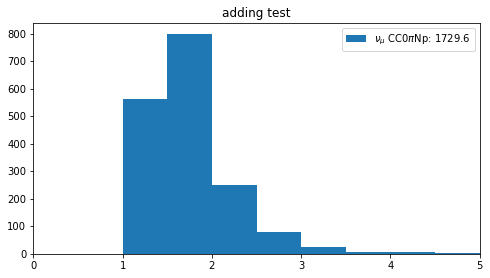

In [12]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}

    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(numu_mc_weights_tot[str(c)][0])) \
            if sum(numu_mc_weights_tot[str(c)][0]) else ""
            for c in numu_mc_vars_tot.keys()
        ]


pup = list(numu_mc_vars_tot.values())

i = 0
for c in numu_mc_vars_tot.keys():
    numu_mc_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot.values())

i = 0
for c in numu_mc_weights_tot.keys():
    numu_mc_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
        


numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 5])
#numu_ax1.set_ylim([0, 14000])

VARIABLE, BINS, RANGE, XTIT = 'true_e',10,(0.0, 5.0),"True Energy [GeV]"

numu_stacked = numu_ax1.hist(
            numu_mc_vars_tot.values(),
            weights=list(numu_mc_weights_tot.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

n_numu_tot = numu_stacked[0]

plt.title("adding test")
plt.legend()

In [13]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)


#wanted_key = 4

#numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

numu_wanted_list = n_numu_tot

Sidenote for unfolding 

In [14]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = numu_wanted_list

print(prior_true_signal)

[  0.           0.         561.56986808 798.55986454 249.50610223
  80.28250519  23.32531792   7.91974064   5.65888833   2.74099447]


In [15]:
if isRun3 == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_run3_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')    

## Make a combined plot

[  0.           0.         197.93954584 364.49462748 194.72521974
  88.86107046  44.07925294  26.19716851  13.66044426   7.22878388]


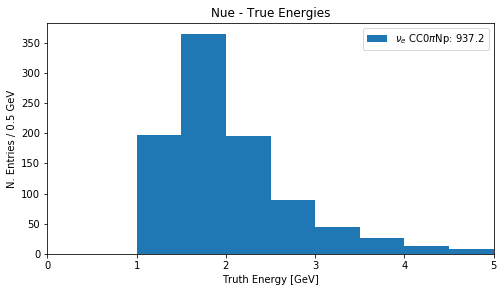

In [9]:
#################
####NUE#########
#################

category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


########################################
pup = list(nue_nue_vars_tot_run1.values())

i = 0
for c in nue_nue_vars_tot_run1.keys():
    nue_nue_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_run1.values())

i = 0
for c in nue_nue_weights_tot_run1.keys():
    nue_nue_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
############################################# 
pup = list(nue_nue_vars_tot_run3.values())

i = 0
for c in nue_nue_vars_tot_run3.keys():
    nue_nue_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_run3.values())

i = 0
for c in nue_nue_weights_tot_run3.keys():
    nue_nue_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_vars_tot_run1, nue_nue_vars_tot_run3]
weightss = [nue_nue_weights_tot_run1, nue_nue_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'true_e',10,(0.0, 5.0),"True Energy [GeV]"

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



#current_total_hist = (nue_stacked[0][-1])


nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

n_nue_tot = (nue_stacked[0])
print(n_nue_tot)
n_nue_tot = n_nue_tot


#current_total_hist_comb = (nue_stacked_comb[0][-1])
#current_total_hist = (nue_stacked[0])


#nue_allsel_ax1.set_ylim([0, 50])

plt.title("Nue - True Energies")
plt.xlabel("Truth Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [10]:
nue_wanted_list = n_nue_tot

In [11]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = nue_wanted_list

print(prior_true_signal)
print(sum(prior_true_signal))

[  0.           0.         197.93954584 364.49462748 194.72521974
  88.86107046  44.07925294  26.19716851  13.66044426   7.22878388]
937.1861131120842


In [12]:
if isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')

[   0.            0.         2440.21399913 2191.0311344   639.4803911
  166.61190571   66.30718169   28.91867779   23.97132792   16.47714637]


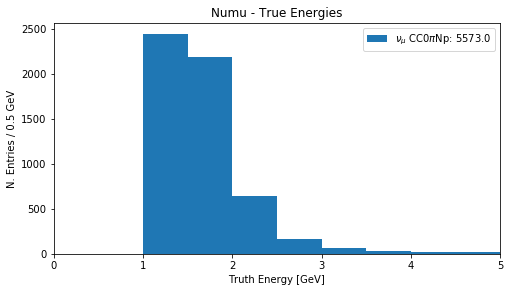

In [13]:
#################
####NUMU#########
#################

category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


########################################
pup = list(numu_mc_vars_tot_run1.values())

i = 0
for c in numu_mc_vars_tot_run1.keys():
    numu_mc_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_run1.values())

i = 0
for c in numu_mc_weights_tot_run1.keys():
    numu_mc_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
############################################# 
pup = list(numu_mc_vars_tot_run3.values())

i = 0
for c in numu_mc_vars_tot_run3.keys():
    numu_mc_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_run3.values())

i = 0
for c in numu_mc_weights_tot_run3.keys():
    numu_mc_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [numu_mc_vars_tot_run1, numu_mc_vars_tot_run3]
weightss = [numu_mc_weights_tot_run1, numu_mc_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'true_e',10,(0.0, 5.0),"True Energy [GeV]"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



#current_total_hist = (nue_stacked[0][-1])


numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

n_numu_tot = (numu_stacked[0])
print(n_numu_tot)
n_numu_tot = n_numu_tot


#current_total_hist_comb = (nue_stacked_comb[0][-1])
#current_total_hist = (nue_stacked[0])


#nue_allsel_ax1.set_ylim([0, 50])

plt.title("Numu - True Energies")
plt.xlabel("Truth Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [14]:
numu_wanted_list = n_numu_tot

In [15]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = numu_wanted_list

print(prior_true_signal)

[   0.            0.         2440.21399913 2191.0311344   639.4803911
  166.61190571   66.30718169   28.91867779   23.97132792   16.47714637]


In [16]:
if isCombined == True:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')

## Ratio Plot


bin_ratios:
[0, 0, 0.0811156504751989, 0.16635757555348119, 0.304505380379132, 0.5333416605451455, 0.6647734351134071, 0.905890950703797, 0.5698659793249499, 0.4387157655149328]


Making ratio plot.
count,  [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
bins,  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Weights,  [0, 0, 0.0811156504751989, 0.16635757555348119, 0.304505380379132, 0.5333416605451455, 0.6647734351134071, 0.905890950703797, 0.5698659793249499, 0.4387157655149328]



Text(0.5, 1.0, 'Ratio')

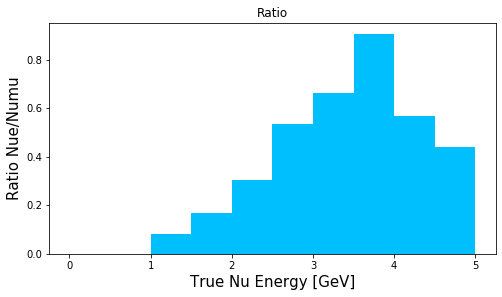

In [17]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])

rbin_ratios = []

#This comes out of the above plots, be it R1, R3, or Combined
nue_ratio_nums = nue_wanted_list
numu_ratio_nums = numu_wanted_list

for i in range(len(numu_ratio_nums)):
    if nue_ratio_nums[i] > 0 and numu_ratio_nums[i] > 0:
        rratio = nue_ratio_nums[i]/numu_ratio_nums[i]
        rbin_ratios.append(rratio)
    else:
        rbin_ratios.append(0)

print("")
print("bin_ratios:")
print(rbin_ratios)
print("")

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
weights = []
for i in range(len(count)):
    weight = count[i]*rbin_ratios[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", rbin_ratios)
print("")

sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=rbin_ratios)
ratio_ax1.set_ylabel('Ratio Nue/Numu', fontsize=15)
ratio_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
ratio_ax1.set_title("Ratio")

## Errors

### Get ratio stat errs

In [18]:
if isCombined == False:
    nue_nue_stat_errs = np.array(nue_nue_stat_errs)

    numu_mc_stat_errs = np.array(numu_mc_stat_errs)
elif isCombined == True:
    nue_nue_stat_errs_run1 = np.array(nue_nue_stat_errs_run1)
    numu_mc_stat_errs_run1 = np.array(numu_mc_stat_errs_run1)
    nue_nue_stat_errs_run3 = np.array(nue_nue_stat_errs_run3)
    numu_mc_stat_errs_run3 = np.array(numu_mc_stat_errs_run3)
    

### Expected Error Calculations

In [19]:
if isCombined == False:
    nue_exp_err    = np.sqrt(nue_nue_stat_errs)
    totalstat_nue = nue_nue_stat_errs
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")

    numu_exp_err    = np.sqrt(numu_mc_stat_errs)
    totalstat_numu = numu_mc_stat_errs
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
elif isCombined == True:
    nue_exp_err    = np.sqrt(nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3)
    totalstat_nue = nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    numu_exp_err    = np.sqrt(numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3)
    totalstat_numu = numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)

totalstat_nue  [0.         0.         2.8459626  5.2667858  2.92155528 1.42204268
 0.72447328 0.43638776 0.22038175 0.11595531]
nue_exp_err  [0.         0.         1.6869981  2.29494789 1.70925577 1.19249431
 0.85115996 0.66059651 0.46944835 0.34052211]

totalstat_numu  [  0.           0.         442.77840272 407.45106754 114.73036589
  30.58992541  13.16602575   6.02965063   4.96695977   3.40333203]
numu_exp_err  [ 0.          0.         21.04230032 20.1854172  10.71122616  5.53081598
  3.62850186  2.45553469  2.22866771  1.84481219]


In [20]:
###########################################################
#Making cov matricies - the real errors
###########################################################

nue_cov           = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_stat   = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_detsys = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_data_stat = np.zeros([len(nue_exp_err), len(nue_exp_err)])

numu_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

ratio_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

print(ratio_cov)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
if isCombined == False:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_stat_errs)
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_mc_stat_errs)
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))
elif isCombined == True:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3 )
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3)
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))


#Now find the ratio error by combining the variances
squared_ratio_numbers = [number ** 2 for number in rbin_ratios]
dnue = np.diag(nue_cov_mc_stat)/(n_nue_tot**2)
dnumu = np.diag(numu_cov_mc_stat)/(n_numu_tot**2)
rratio_stat_errs = squared_ratio_numbers*((dnue) + (dnumu))


ratio_cov_mc_stat[np.diag_indices_from(ratio_cov_mc_stat)]     = rratio_stat_errs
print("ratio_cov_mc_stat = ", np.nan_to_num(np.diag(ratio_cov_mc_stat)))

nue_cov_mc_stat =  [0.         0.         2.8459626  5.2667858  2.92155528 1.42204268
 0.72447328 0.43638776 0.22038175 0.11595531]
numu_cov_mc_stat =  [  0.           0.         442.77840272 407.45106754 114.73036589
  30.58992541  13.16602575   6.02965063   4.96695977   3.40333203]
ratio_cov_mc_stat =  [0.00000000e+00 0.00000000e+00 9.67200204e-07 3.44600051e-06
 3.31587019e-05 3.64683760e-04 1.48814751e-03 6.43861720e-03
 3.19058447e-03 2.83981646e-03]


/tmp/ipykernel_6038/1545439491.py:17: RuntimeWarning: invalid value encountered in true_divide
  dnue = np.diag(nue_cov_mc_stat)/(n_nue_tot**2)
/tmp/ipykernel_6038/1545439491.py:18: RuntimeWarning: invalid value encountered in true_divide
  dnumu = np.diag(numu_cov_mc_stat)/(n_numu_tot**2)


In [22]:
#0.6% fractional value being added for nue
#3.2% fractional value being added for numu
#2.4% fractional value being added for ratio

#############################

#i.e. add 12.2%^2 * n total value ^2 (converting fractional to add to non fractional)

#frac_detsys_value_toreg = 0.01*(n_nue_tot*n_nue_tot)
#print(frac_detsys_value_toreg)
#nue_detsys_exp_err = np.full([len(numu_exp_err), len(numu_exp_err)], frac_detsys_value_toreg)

###########################

nue_detsys_errs = (0.006*0.006)*(n_nue_tot*n_nue_tot)
nue_cov_mc_detsys[np.diag_indices_from(nue_cov_mc_detsys)]   = (nue_detsys_errs)
print("nue_cov_mc_detsys = ", np.diag(nue_cov_mc_detsys))


nue_detsys_exp_err = np.sqrt(np.diag(nue_cov_mc_detsys))
nue_detsys_frac_err = nue_detsys_exp_err/(n_nue_tot)
print("totalstat_nue_detsys ", nue_detsys_errs )
print("nue_detsys_exp_err ", nue_detsys_exp_err)
print("nue_detsys_frac_err ", nue_detsys_frac_err)
print("")

#####################################################

numu_detsys_errs = (0.032*0.032)*(n_numu_tot*n_numu_tot)
numu_cov_mc_detsys[np.diag_indices_from(numu_cov_mc_detsys)]   = (numu_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_detsys = ", np.diag(numu_cov_mc_detsys))

numu_detsys_exp_err = np.sqrt(np.diag(numu_cov_mc_detsys))
numu_detsys_frac_err = numu_detsys_exp_err/n_numu_tot
print("totalstat_numu_detsys ", numu_detsys_errs )
print("numu_detsys_exp_err ", numu_detsys_exp_err)
print("numu_detsys_frac_err ", numu_detsys_frac_err)
print("")

#######################################################

ratio_detsys_errs = (0.024*0.024)*(np.array(rbin_ratios)*np.array(rbin_ratios))
ratio_cov_mc_detsys[np.diag_indices_from(ratio_cov_mc_detsys)]   = (ratio_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("ratio_cov_mc_detsys = ", np.diag(ratio_cov_mc_detsys))

ratio_detsys_exp_err = np.sqrt(np.diag(ratio_cov_mc_detsys))
ratio_detsys_frac_err = ratio_detsys_exp_err/rbin_ratios
print("totalstat_ratio_detsys ", ratio_detsys_errs )
print("ratio_detsys_exp_err ", ratio_detsys_exp_err)
print("ratio_detsys_frac_err ", ratio_detsys_frac_err)
print("")

#######################################################

nue_cov_mc_detsys =  [0.00000000e+00 0.00000000e+00 1.41048230e+00 4.78282800e+00
 1.36504480e+00 2.84266434e-01 6.99472994e-02 2.47064990e-02
 6.71787855e-03 1.88119139e-03]
totalstat_nue_detsys  [0.00000000e+00 0.00000000e+00 1.41048230e+00 4.78282800e+00
 1.36504480e+00 2.84266434e-01 6.99472994e-02 2.47064990e-02
 6.71787855e-03 1.88119139e-03]
nue_detsys_exp_err  [0.         0.         1.18763728 2.18696776 1.16835132 0.53316642
 0.26447552 0.15718301 0.08196267 0.0433727 ]
nue_detsys_frac_err  [  nan   nan 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006]

numu_cov_mc_detsys =  [0.00000000e+00 0.00000000e+00 6.09755583e+03 4.91583225e+03
 4.18749615e+02 2.84257558e+01 4.50216176e+00 8.56360883e-01
 5.88415552e-01 2.78012265e-01]
totalstat_numu_detsys  [0.00000000e+00 0.00000000e+00 6.09755583e+03 4.91583225e+03
 4.18749615e+02 2.84257558e+01 4.50216176e+00 8.56360883e-01
 5.88415552e-01 2.78012265e-01]
numu_detsys_exp_err  [ 0.          0.         78.08684797 70.1129963  20.463372

/tmp/ipykernel_6038/753557639.py:21: RuntimeWarning: invalid value encountered in true_divide
  nue_detsys_frac_err = nue_detsys_exp_err/(n_nue_tot)
/tmp/ipykernel_6038/753557639.py:35: RuntimeWarning: invalid value encountered in true_divide
  numu_detsys_frac_err = numu_detsys_exp_err/n_numu_tot
/tmp/ipykernel_6038/753557639.py:49: RuntimeWarning: invalid value encountered in true_divide
  ratio_detsys_frac_err = ratio_detsys_exp_err/rbin_ratios


### Now need the systematic errors

In [23]:
if isCombined == False:
    nue_cov = (cov_nue_nue_ppfx + cov_nue_nue_genie + cov_nue_nue_reint)
    nue_cov += (cov_nue_nue_geo)

    numu_cov = (cov_numu_mc_ppfx + cov_numu_mc_genie + cov_numu_mc_reint)
    numu_cov += (cov_numu_mc_geo)
elif isCombined == True:
    nue_cov = (cov_nue_nue_ppfx_run1 + cov_nue_nue_genie_run1 + cov_nue_nue_reint_run1 + cov_nue_nue_ppfx_run3 + cov_nue_nue_genie_run3 + cov_nue_nue_reint_run3)
    nue_cov += (cov_nue_nue_geo_run1 + cov_nue_nue_geo_run3)

    numu_cov = (cov_numu_mc_ppfx_run1 + cov_numu_mc_genie_run1 + cov_numu_mc_reint_run1 + cov_numu_mc_ppfx_run3 + cov_numu_mc_genie_run3 + cov_numu_mc_reint_run3 )
    numu_cov += (cov_numu_mc_geo_run1 + cov_numu_mc_geo_run3)

In [24]:
nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys)))

numu_exp_err = np.sqrt( np.diag((numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys)))

print("")
print("nue_exp_err ", nue_exp_err)
print("")
nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot)
print("nue_frac_err ",nue_frac_err)
print("")
print("numu_exp_err ", numu_exp_err)
numu_frac_err = np.nan_to_num(numu_exp_err / n_numu_tot)
print("")
print("numu_frac_err ", numu_frac_err)


nue_exp_err  [ 0.          0.         35.36930529 55.85003336 29.80652315 13.85688327
  7.82151558  5.44556196  3.21613808  2.03854695]

nue_frac_err  [0.         0.         0.17868741 0.15322594 0.15306966 0.15593874
 0.17744211 0.20786834 0.23543437 0.28200414]

numu_exp_err  [  0.           0.         384.47159304 370.48336109  98.48898118
  23.84337534  11.73357017   5.31554392   5.43664804   3.71878179]

numu_frac_err  [0.         0.         0.15755651 0.16909087 0.15401408 0.14310727
 0.17695776 0.18381006 0.22679795 0.22569332]


/tmp/ipykernel_6038/3680011240.py:8: RuntimeWarning: invalid value encountered in true_divide
  nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot)
/tmp/ipykernel_6038/3680011240.py:12: RuntimeWarning: invalid value encountered in true_divide
  numu_frac_err = np.nan_to_num(numu_exp_err / n_numu_tot)


In [25]:
total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys
total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys

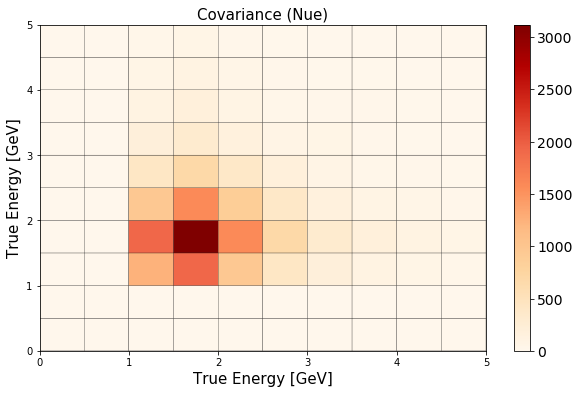

In [26]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_nue_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Covariance (Nue)', fontsize=15)

plt.savefig("Nue_Full_Truth_Cov.svg", bbox_inches='tight')

plt.show()

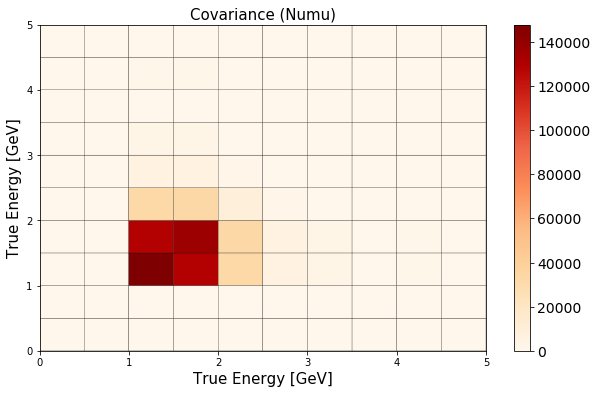

In [27]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_numu_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Covariance (Numu)', fontsize=15)

plt.savefig("Numu_Full_Truth_Cov.svg", bbox_inches='tight')

plt.show()

In [28]:
nue_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_nue_cov[i][j]
        
        if n_nue_tot[i]*n_nue_tot[j] != 0:
            nue_frac_cov[i][j] += c/(n_nue_tot[i]*n_nue_tot[j])
            
print(nue_frac_cov)
print("")
print(np.sqrt(np.diag(nue_frac_cov)))
print("")

############################################

numu_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_numu_cov[i][j]
        
        if n_numu_tot[i]*n_numu_tot[j] != 0:
            numu_frac_cov[i][j] += c/(n_numu_tot[i]*n_numu_tot[j])

print("")
print(numu_frac_cov)
print("")
print(np.sqrt(np.diag(numu_frac_cov)))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.031929191413204175, 0.026785885630714684, 0.025244933112266197, 0.024124353433785828, 0.023525160796551026, 0.0231304596999506, 0.02551879292709682, 0.026680760378321077], [0, 0, 0.026785885630714684, 0.023478189897795626, 0.02235363849088273, 0.021358339000388613, 0.020254659544689593, 0.01993124283572828, 0.022538656717066615, 0.02388401644993787], [0, 0, 0.025244933112266197, 0.02235363849088273, 0.02343032075942066, 0.022923036195544113, 0.01897407961716381, 0.01720306197453793, 0.022063273978539872, 0.023545261130911623], [0, 0, 0.024124353433785828, 0.021358339000388613, 0.022923036195544113, 0.024316890295384353, 0.020814987793856158, 0.018825758624350902, 0.02457745909899151, 0.02531735078130625], [0, 0, 0.023525160796551026, 0.020254659544689593, 0.01897407961716381, 0.020814987793856158, 0.03148570181338421, 0.031097885371939502, 0.02991123478332604, 0.025816898629984694], [0, 0, 0.0231304596999506, 0.0

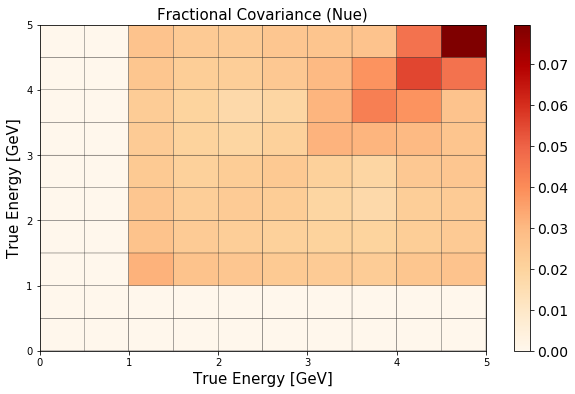

In [29]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Fractional Covariance (Nue)', fontsize=15)

plt.savefig("Nue_Full_Truth_FracCov.svg", bbox_inches='tight')

plt.show()

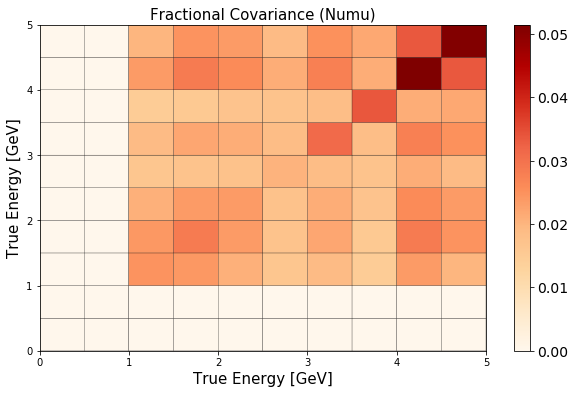

In [30]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Fractional Covariance (Numu)', fontsize=15)

plt.savefig("Numu_Full_Truth_FracCov.svg", bbox_inches='tight')

plt.show()

In [31]:
##########################
nue_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 

for i in range(len(total_nue_cov)): 
    for j in range(len(total_nue_cov[i])): 

        if np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]) != 0: 
            nue_cor[i][j] = total_nue_cov[i][j] / (np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]))
            
##########################
numu_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 

for i in range(len(total_numu_cov)): 
    for j in range(len(total_numu_cov[i])): 

        if np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]) != 0: 
            numu_cor[i][j] = total_numu_cov[i][j] / (np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]))            

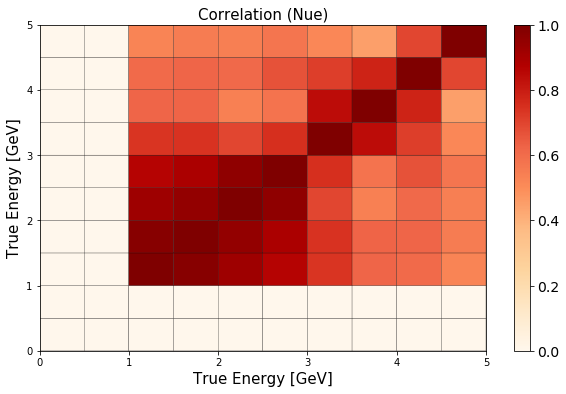

In [32]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_cor, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Correlation (Nue)', fontsize=15)

plt.savefig("Nue_Full_Truth_Cor.svg", bbox_inches='tight')

plt.show()

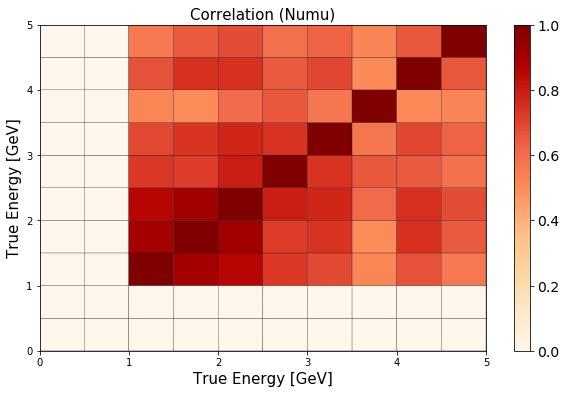

In [33]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_cor, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Energy [GeV]", fontsize=15)
plt.ylabel("True Energy [GeV]", fontsize=15)


plt.title('Correlation (Numu)', fontsize=15)

plt.savefig("Numu_Full_Truth_Cor.svg", bbox_inches='tight')

plt.show()

### Ratio Sys Errors

In [34]:
#####CORRECT way of doing ratio errors##########
##################
#### ppfx ##########
##################


####First get the central value to compare against. We have already got this above. 
#This will come from plots, so irrelevant if from R1, R3, or Combined
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list

rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_ppfx
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_ppfx_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_ppfx_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()

    ##Numu
    s_m = numu_mc_df_ppfx
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_ppfx_vars.squeeze()
    #variable_numu = variable_numu["nu_e"] 
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_ppfx_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    #spline_fix_var_numu = spline_fix_var_numu["weightSplineTimesTuneTimesPPFX"]


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)
            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_ppfx_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_ppfx_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_ppfx_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_ppfx_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_ppfx_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_ppfx_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_ppfx_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_ppfx_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_ppfx_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_ppfx_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_ppfx_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_ppfx_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys             

        
##Cov matrix

cov_ratio_ppfx = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_ppfx.fill(0)

n_cv_tot = rbin_cv_ratios

a = -1
for n in n_tot:
    a = a + 1
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_ppfx[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

                
cov_ratio_ppfx /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_ppfx)
print("--------------------------------------------------")
print("")



cov of ratio sys error =  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.39277641e-05  4.26215085e-05
   5.12489614e-05  1.12432146e-05  5.55854868e-06 -1.40910707e-05
  -3.44952844e-05 -2.27835402e-05]
 [ 0.00000000e+00  0.00000000e+00  4.26215085e-05  9.56110082e-05
   1.23666954e-04  1.90108291e-05  5.76564113e-05 -1.19981301e-04
  -4.34356496e-05 -6.75957658e-05]
 [ 0.00000000e+00  0.00000000e+00  5.12489614e-05  1.23666954e-04
   2.08757203e-04  3.14016015e-05  1.62392047e-04 -2.20048124e-04
  -8.59032617e-05 -9.16383778e-05]
 [ 0.00000000e+00  0.00000000e+00  1.12432146e-05  1.90108291e-05
   3.14016015e-05  3.52821401e-04  4.63325964e-04  4.62395621e-04
   2.8

In [35]:
#####CORRECT way of doing ratio errors##########
##################
#### genie ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_genie
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_genie_vars.squeeze()
    #variable_nue = variable_nue["nu_e"] 
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_genie_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()
    #print(spline_fix_var_nue)
    #spline_fix_var_nue = spline_fix_var_nue["weightSpline"]

    ##Numu
    s_m = numu_mc_df_genie
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_genie_vars.squeeze()
    #variable_numu = variable_numu["nu_e"] 
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_genie_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    #spline_fix_var_numu = spline_fix_var_numu["weightSpline"]


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_genie_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_genie_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_genie_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_genie_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_genie_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_genie_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_genie_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_genie_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_genie_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_genie_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_genie_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_genie_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_genie = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_genie.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_genie[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_genie /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_genie)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.30713915e-05 -6.37824888e-06
  -7.92013677e-06  2.33174618e-04  1.88878565e-04  4.20962271e-04
   2.14742330e-05  9.85564817e-05]
 [ 0.00000000e+00  0.00000000e+00 -6.37824888e-06  9.65066040e-06
   1.30839786e-05 -3.99322461e-05 -1.93057067e-05 -8.39113576e-05
   2.91857483e-05  2.90225787e-06]
 [ 0.00000000e+00  0.00000000e+00 -7.92013677e-06  1.30839786e-05
   5.11132923e-05  4.34320195e-05  1.05312633e-04  1.35839059e-05
   1.43239431e-04  6.82223876e-05]
 [ 0.00000000e+00  0.00000000e+00  2.33174618e-04 -3.99322461e-05
   4.34320195e-05  2.20632726e-03  1.93966227e-03  4.13548058e-03
   9.7

In [36]:
#####CORRECT way of doing ratio errors##########
##################
#### reint ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_reint
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_reint_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_reint_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()

    ##Numu
    s_m = numu_mc_df_reint
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_reint_vars.squeeze()
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_reint_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_reint_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_reint_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_reint_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_reint_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_reint_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_reint_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_reint_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_reint_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_reint_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_reint_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_reint_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_reint_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_reint = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_reint.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_reint[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_reint /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_reint)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.61024683e-09 -1.71213411e-08
   8.37838632e-08 -2.72407840e-08  5.08706867e-07  2.00890295e-06
  -7.92788446e-07  4.85111079e-07]
 [ 0.00000000e+00  0.00000000e+00 -1.71213411e-08  1.93159527e-06
   1.06893290e-06  4.07528866e-06  1.75456488e-05 -2.03554093e-05
   2.68187366e-06 -5.66420728e-06]
 [ 0.00000000e+00  0.00000000e+00  8.37838632e-08  1.06893290e-06
   2.88059893e-06  1.91451939e-06  2.45313690e-05  1.99417963e-05
  -1.36569242e-05 -1.43836032e-06]
 [ 0.00000000e+00  0.00000000e+00 -2.72407840e-08  4.07528866e-06
   1.91451939e-06  1.24170039e-05  4.05086819e-05 -4.10189621e-05
   1.8

In [37]:
#####CORRECT way of doing ratio errors##########
##################
#### geo ##########
##################

####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 10
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    cov_ratio_geo = False
    
    ##Nue
    s_n = nue_nue_df_geo
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_geo_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_geo_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()


    ##Numu
    s_m = numu_mc_df_geo
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_geo_vars.squeeze()
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_geo_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    
    ##Ratio
    print("Number of variations Universes",10)
    for variationNumber in [x*2 for x in range(10)]:
        n_tot = np.empty([2, n_bins])
        n_tot.fill(0.)
        if (not df_n.empty) and (not df_m.empty):
            for i in range(2):
                weight_n = df_n[i+variationNumber].values
                weight_n[np.isnan(weight_n)] = 1
                weight_n[weight_n > 100] = 1
                weight_n[weight_n < 0] = 1
                weight_n[weight_n == np.inf] = 1
                weight_m = df_m[i+variationNumber].values
                weight_m[np.isnan(weight_m)] = 1
                weight_m[weight_m > 100] = 1
                weight_m[weight_m < 0] = 1
                weight_m[weight_m == np.inf] = 1
                n_n, bins = np.histogram(
                    variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
                n_m, bins = np.histogram(
                    variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

                rbin_ratios_sys = []

                for g in range(len(n_n)):
                    if n_n[g] > 0 and n_m[g] > 0:
                        rratio = n_n[g]/n_m[g]
                        rbin_ratios_sys.append(rratio)
                    else:
                        rbin_ratios_sys.append(0)

                n_tot[i] += rbin_ratios_sys

                
    ##Cov matrix

    tempCov = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
    tempCov.fill(0)

    x = variationNumber/2
    for n in n_tot:
        for i in range(len(rbin_cv_ratios)):
            for j in range(len(rbin_cv_ratios)):
                a = int(i)
                b = int(j)
                tempCov[a][b] += (n[a] - rbin_cv_ratios[a]) * (n[b] - rbin_cv_ratios[b])


    tempCov /= 2
    if variationNumber == 0 or (not cov_ratio_geo):
        cov_ratio_geo = tempCov
    else:
        cov_ratio_geo += tempCov         

elif isCombined == True:
    
    cov_ratio_geo = False
    
    ##Nue
    s_n_run1 = nue_nue_df_geo_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_geo_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_geo_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_geo_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_geo_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_geo_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_geo_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_geo_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_geo_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_geo_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_geo_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_geo_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    
    ##Ratio
    print("Number of variations Universes",10)
    for variationNumber in [x*2 for x in range(10)]:
        n_tot = np.empty([2, n_bins])
        n_tot.fill(0.)
        if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
            for i in range(2):
                weight_n_run1 = df_n_run1[i+variationNumber].values    ###
                weight_n_run1[np.isnan(weight_n_run1)] = 1
                weight_n_run1[weight_n_run1 > 100] = 1
                weight_n_run1[weight_n_run1 < 0] = 1
                weight_n_run1[weight_n_run1 == np.inf] = 1
                weight_n_run3 = df_n_run3[i+variationNumber].values    ###
                weight_n_run3[np.isnan(weight_n_run3)] = 1
                weight_n_run3[weight_n_run3 > 100] = 1
                weight_n_run3[weight_n_run3 < 0] = 1
                weight_n_run3[weight_n_run3 == np.inf] = 1
                weight_m_run1 = df_m_run1[i+variationNumber].values    ###
                weight_m_run1[np.isnan(weight_m_run1)] = 1
                weight_m_run1[weight_m_run1 > 100] = 1
                weight_m_run1[weight_m_run1 < 0] = 1
                weight_m_run1[weight_m_run1 == np.inf] = 1
                weight_m_run3 = df_m_run3[i+variationNumber].values    ###
                weight_m_run3[np.isnan(weight_m_run3)] = 1
                weight_m_run3[weight_m_run3 > 100] = 1
                weight_m_run3[weight_m_run3 < 0] = 1
                weight_m_run3[weight_m_run3 == np.inf] = 1
                n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
                n_n_run3, bins = np.histogram(
                    variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
                n_m_run1, bins = np.histogram(
                    variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
                n_m_run3, bins = np.histogram(
                    variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)

                rbin_ratios_sys = []
                
                n_n = n_n_run1 + n_n_run3
                n_m = n_m_run1 + n_m_run3

                for g in range(len(n_n)):
                    if n_n[g] > 0 and n_m[g] > 0:
                        rratio = n_n[g]/n_m[g]
                        rbin_ratios_sys.append(rratio)
                    else:
                        rbin_ratios_sys.append(0)

                n_tot[i] += rbin_ratios_sys
    

    ##Cov matrix

    tempCov = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
    tempCov.fill(0)

    x = variationNumber/2
    for n in n_tot:
        for i in range(len(rbin_cv_ratios)):
            for j in range(len(rbin_cv_ratios)):
                a = int(i)
                b = int(j)
                tempCov[a][b] += (n[a] - rbin_cv_ratios[a]) * (n[b] - rbin_cv_ratios[b])


    tempCov /= 2
    if (variationNumber == 0) or (not cov_ratio_geo):
        cov_ratio_geo = tempCov
    else:
        cov_ratio_geo += tempCov 
    
print("")
print("cov of ratio sys error = ", cov_ratio_geo)
print("--------------------------------------------------")
print("")

Number of variations Universes 10

cov of ratio sys error =  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.75373745e-07  6.12017434e-07
  -3.16504766e-06 -6.52027363e-06  2.47636837e-06  3.16674874e-05
   2.13092441e-05  6.48493026e-06]
 [ 0.00000000e+00  0.00000000e+00  6.12017434e-07  2.16133744e-06
  -6.02398827e-06 -1.31077811e-05 -2.92189272e-06  6.42074210e-05
   7.14715179e-05  4.55931908e-05]
 [ 0.00000000e+00  0.00000000e+00 -3.16504766e-06 -6.02398827e-06
   3.76520674e-05  7.66864740e-05 -3.90882124e-05 -3.71760325e-04
  -2.14512994e-04 -3.52131673e-05]
 [ 0.00000000e+00  0.00000000e+00 -6.52027363e-06 -1.31077811e-05
   7.66864740e-05  1.56775676e-04 -7.3

In [38]:
ratio_cov = (cov_ratio_ppfx + cov_ratio_genie + cov_ratio_reint)
ratio_cov += (cov_ratio_geo)

print(ratio_cov)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  5.72811395e-05  3.68381557e-05
   4.02475609e-05  2.37870319e-04  1.97422189e-04  4.40547591e-04
   7.49540419e-06  8.27429828e-05]
 [ 0.00000000e+00  0.00000000e+00  3.68381557e-05  1.09354601e-04
   1.31795877e-04 -2.99539094e-05  5.29744607e-05 -1.60040647e-04
   5.99034903e-05 -2.47645244e-05]
 [ 0.00000000e+00  0.00000000e+00  4.02475609e-05  1.31795877e-04
   3.00403162e-04  1.53434614e-04  2.53147837e-04 -5.58282747e-04
  -1.70833749e-04 -6.00675178e-05]
 [ 0.00000000e+00  0.00000000e+00  2.37870319e-04 -2.99539094e-05
   1.53434614e-04  2.72834134e-03  2.37031110e-03  3.79637616e-03
   8.15440312e-04  1.38017815e-03

In [39]:
total_cov = ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys

##########################

ratio_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_cov[i][j]
        
        if rbin_ratios[i]*rbin_ratios[j] != 0:
            ratio_frac_cov[i][j] = c/(rbin_ratios[i]*rbin_ratios[j])
            
print(ratio_frac_cov)
print("")

##########################
ratio_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 

for i in range(len(total_cov)): 
    for j in range(len(total_cov[i])): 

        if np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]) != 0: 
            ratio_cor[i][j] = total_cov[i][j] / (np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.009428669287972744, 0.0027299245321389357, 0.0016294458776244852, 0.005498320991926537, 0.003661151091374016, 0.0059953184162984145, 0.00016215026826888693, 0.0023251087808120806], [0, 0, 0.0027299245321389357, 0.004651925636576594, 0.0026017422601001096, -0.00033760231858635516, 0.0004790163144291811, -0.0010619688901058895, 0.0006318832078008755, -0.00033931586709334566], [0, 0, 0.0016294458776244852, 0.0026017422601001096, 0.004173381117066711, 0.0009447629788614032, 0.0012505630536616442, -0.002023873271540294, -0.0009844778971313905, -0.00044963641191435414], [0, 0, 0.005498320991926537, -0.00033760231858635516, 0.0009447629788614032, 0.011449576822951047, 0.006685381355551139, 0.007857561842189732, 0.0026829583960228873, 0.005898565371916142], [0, 0, 0.003661151091374016, 0.0004790163144291811, 0.0012505630536616442, 0.006685381355551139, 0.014234950144928624, 0.007421234931324623, 0.00445037965753516, 0.00

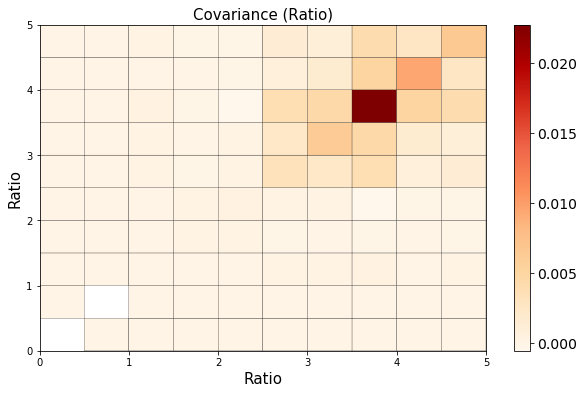

In [40]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Covariance (Ratio)', fontsize=15)

plt.savefig("Ratio_Full_Truth_Cov.svg", bbox_inches='tight')

plt.show()

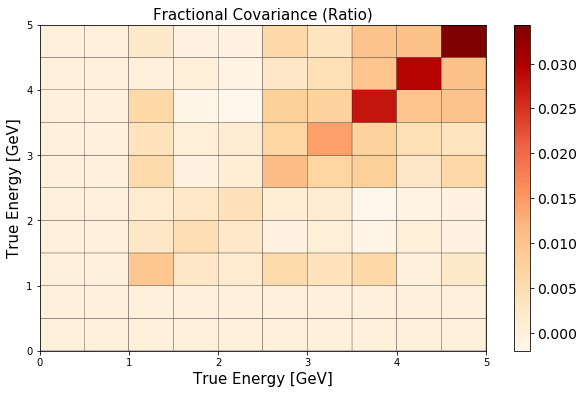

In [41]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, ratio_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Fractional Covariance (Ratio)', fontsize=15)

plt.savefig("Ratio_Full_Truth_FracCov.svg", bbox_inches='tight')

plt.show()

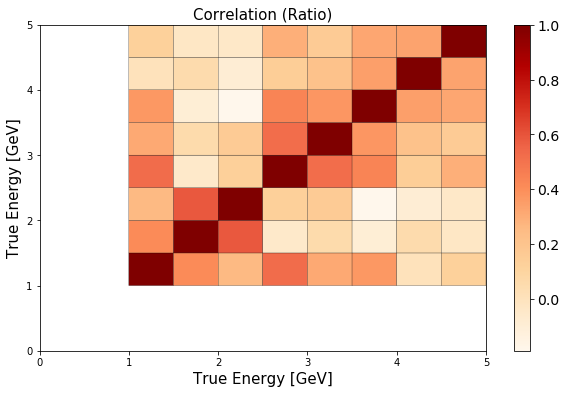

In [42]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, ratio_cor, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Correlation (Ratio)', fontsize=15)

plt.savefig("Ratio_Full_Truth_Cor.svg", bbox_inches='tight')

plt.show()

In [43]:
ratio_exp_err = np.sqrt( np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys)))

print("ratio_cov ", np.diag(ratio_cov))
print("")
print("ratio_cov_mc_stat ", np.nan_to_num(np.diag(ratio_cov_mc_stat)))
print("")
print("np.diag ", np.nan_to_num(np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys))))
print("")
print("ratio_exp_err ", np.nan_to_num(ratio_exp_err))

ratio_cov  [0.00000000e+00 0.00000000e+00 5.72811395e-05 1.09354601e-04
 3.00403162e-04 2.72834134e-03 4.54806655e-03 1.58341433e-02
 6.16527924e-03 3.65765480e-03]

ratio_cov_mc_stat  [0.00000000e+00 0.00000000e+00 9.67200204e-07 3.44600051e-06
 3.31587019e-05 3.64683760e-04 1.48814751e-03 6.43861720e-03
 3.19058447e-03 2.83981646e-03]

np.diag  [0.00000000e+00 0.00000000e+00 6.20382750e-05 1.28741311e-04
 3.86970615e-04 3.25687022e-03 6.29076212e-03 2.27454482e-02
 9.54291811e-03 6.60833486e-03]

ratio_exp_err  [0.         0.         0.00787644 0.01134642 0.01967157 0.057069
 0.07931432 0.15081594 0.09768786 0.08129167]


[0.         0.         0.09330419 0.06286023 0.056919   0.09793633
 0.10144713 0.13890611 0.13778554 0.1378536 ]


/tmp/ipykernel_6038/3550302589.py:11: RuntimeWarning: invalid value encountered in true_divide
  nue_stat_weights = np.nan_to_num(np.sqrt(np.diag(nue_cov_mc_stat))/nue_wanted_list)
/tmp/ipykernel_6038/3550302589.py:12: RuntimeWarning: invalid value encountered in true_divide
  nue_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(nue_cov)))/nue_wanted_list)
/tmp/ipykernel_6038/3550302589.py:13: RuntimeWarning: invalid value encountered in true_divide
  numu_stat_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(numu_cov_mc_stat)))/numu_wanted_list)
/tmp/ipykernel_6038/3550302589.py:14: RuntimeWarning: invalid value encountered in true_divide
  numu_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(numu_cov)))/numu_wanted_list)
/tmp/ipykernel_6038/3550302589.py:15: RuntimeWarning: invalid value encountered in true_divide
  ratio_stat_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(ratio_cov_mc_stat)))/rbin_ratios)
/tmp/ipykernel_6038/3550302589.py:16: RuntimeWa

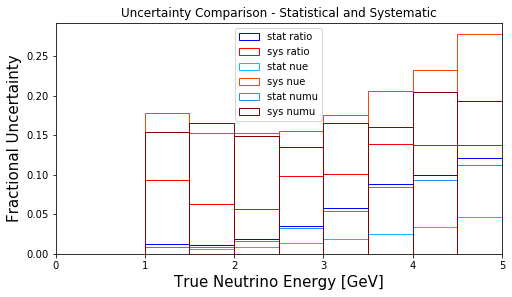

In [44]:
errors_r_fig = plt.figure(figsize=(8, 7))
errors_r_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_r_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]



nue_stat_weights = np.nan_to_num(np.sqrt(np.diag(nue_cov_mc_stat))/nue_wanted_list)
nue_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(nue_cov)))/nue_wanted_list)
numu_stat_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(numu_cov_mc_stat)))/numu_wanted_list)
numu_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(numu_cov)))/numu_wanted_list)
ratio_stat_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(ratio_cov_mc_stat)))/rbin_ratios)
ratio_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(ratio_cov)))/rbin_ratios)

print(ratio_sys_weights)

sel_stat = errors_r_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=ratio_stat_weights, label='stat ratio')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_sys_weights, label='sys ratio')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='deepskyblue', facecolor='None', weights=nue_stat_weights, label='stat nue')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='orangered', facecolor='None', weights=nue_sys_weights, label='sys nue')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='dodgerblue', facecolor='None', weights=numu_stat_weights, label='stat numu')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='darkred', facecolor='None', weights=numu_sys_weights, label='sys numu')
errors_r_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_r_ax1.set_xlabel('True Neutrino Energy [GeV]', fontsize=15)
errors_r_ax1.set_title("Uncertainty Comparison - Statistical and Systematic")
errors_r_ax1.set_xlim([0, 5])
#errors_r_ax1.set_ylim([0, 100])
leg = errors_r_ax1.legend()
#errors_r_ax1.set_yscale('log')

In [45]:
if isRun3 == False and isCombined == False:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_trueE_fraclog_consistent_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_trueE_fraclog_consistent_run3_"+ending+".pdf")
elif isCombined == True:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_trueE_fraclog_consistent_comb_"+ending+".svg",bbox_inches='tight')    
       

In [46]:
ratio_bins = np.arange(0, 5.5, 0.5)
ratio_bincenters = np.arange(0.25, 5.25, 0.5)
ratio_bin_edges = np.arange(0, 5.5, 0.5)
ratio_bin_size = [(ratio_bin_edges[i + 1] - ratio_bin_edges[i]) / 2
            for i in range(len(ratio_bin_edges) - 1)]
ratio_n_tot = rbin_ratios

print(ratio_n_tot)
print("")
print("error")
print(np.nan_to_num(ratio_exp_err))
print("")
ratio_frac_err = np.nan_to_num(ratio_exp_err / ratio_n_tot)
print(ratio_frac_err)
lower_err = np.nan_to_num(ratio_n_tot-ratio_exp_err)

#nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(nue_n_tot-nue_exp_err))
#numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(numu_n_tot-numu_exp_err))
ratio_ax1.bar(ratio_bincenters, ratio_exp_err*2,width=[n*2 for n in ratio_bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))
#ratio_ax1.set_ylim([0, 2.1])
ratio_ax1.set_xlim([0, 5])

[0, 0, 0.0811156504751989, 0.16635757555348119, 0.304505380379132, 0.5333416605451455, 0.6647734351134071, 0.905890950703797, 0.5698659793249499, 0.4387157655149328]

error
[0.         0.         0.00787644 0.01134642 0.01967157 0.057069
 0.07931432 0.15081594 0.09768786 0.08129167]

[0.         0.         0.09710134 0.06820503 0.06460171 0.1070027
 0.11931031 0.16648355 0.17142252 0.18529461]


(0, 5)

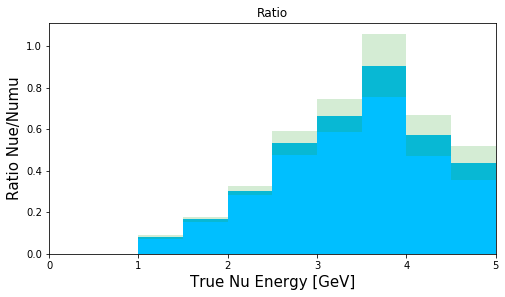

In [47]:
ratio_fig


In [48]:
if isRun3 == False and isCombined == False:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_trueE_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".pdf") 
elif isCombined == True:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_trueE_recoCut_comb_"+ending+".svg",bbox_inches='tight')    

In [49]:
nue_bin_edges = np.arange(0, 5.5, 0.5)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
nue_bin_size = [(nue_bin_edges[i + 1] - nue_bin_edges[i]) / 2
            for i in range(len(nue_bin_edges) - 1)]

nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot)
print(nue_frac_err)
lower_err = np.nan_to_num(n_nue_tot-nue_exp_err)

nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_nue_tot-nue_exp_err))

[0.         0.         0.17868741 0.15322594 0.15306966 0.15593874
 0.17744211 0.20786834 0.23543437 0.28200414]


/tmp/ipykernel_6038/2458705525.py:6: RuntimeWarning: invalid value encountered in true_divide
  nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot)


<BarContainer object of 10 artists>

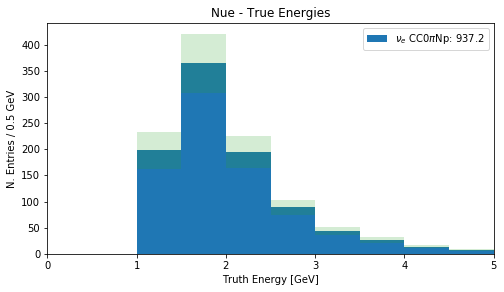

In [50]:
nue_fig

In [51]:
if isRun3 == False and isCombined == False:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_trueE_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".pdf")
elif isCombined == True:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_trueE_recoCut_comb_"+ending+".svg",bbox_inches='tight')    

In [52]:
numu_bin_edges = np.arange(0, 5.5, 0.5)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])
numu_bin_size = [(numu_bin_edges[i + 1] - numu_bin_edges[i]) / 2
            for i in range(len(numu_bin_edges) - 1)]

numu_frac_err = np.nan_to_num(numu_exp_err / n_numu_tot)
print(numu_frac_err)
lower_err = np.nan_to_num(n_numu_tot-numu_exp_err)

numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

[0.         0.         0.15755651 0.16909087 0.15401408 0.14310727
 0.17695776 0.18381006 0.22679795 0.22569332]


/tmp/ipykernel_6038/325155467.py:6: RuntimeWarning: invalid value encountered in true_divide
  numu_frac_err = np.nan_to_num(numu_exp_err / n_numu_tot)


<BarContainer object of 10 artists>

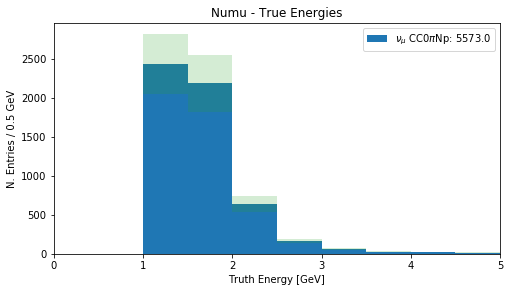

In [53]:
numu_fig

In [54]:
if isRun3 == False and isCombined == False:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_trueE_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".pdf") 
elif isCombined == True:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_trueE_recoCut_comb_"+ending+".svg",bbox_inches='tight' )    

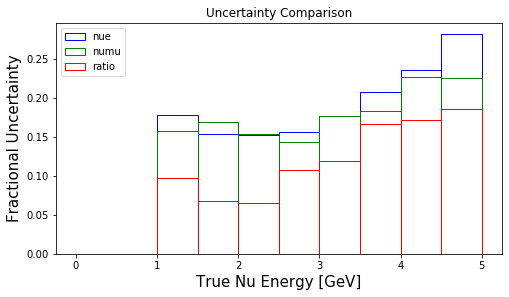

In [55]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]



sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()
#errors_ax1.set_xlim([0, 5])
#errors_ax1.set_ylim([0, 1])

In [56]:
if isRun3 == False and isCombined == False:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_trueE_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_trueE_recoCut_run3_"+ending+".pdf")
elif isCombined == True:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_trueE_recoCut_comb_"+ending+".svg",bbox_inches='tight')   

## For Blockwise Unfolding

In [57]:
print("n_nue_tot", n_nue_tot)

n_nue_tot [  0.           0.         197.93954584 364.49462748 194.72521974
  88.86107046  44.07925294  26.19716851  13.66044426   7.22878388]


In [58]:
print("n_numu_tot", n_numu_tot)

n_numu_tot [   0.            0.         2440.21399913 2191.0311344   639.4803911
  166.61190571   66.30718169   28.91867779   23.97132792   16.47714637]


In [59]:
nue_numu_tot = np.concatenate((n_nue_tot, n_numu_tot), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

###################################
#Non-Zero inputs

nue_numu_tot_nonzero = np.concatenate((n_nue_tot[2:], n_numu_tot[2:]), axis=0)

print(nue_numu_tot_nonzero)
print(len(nue_numu_tot_nonzero))

[   0.            0.          197.93954584  364.49462748  194.72521974
   88.86107046   44.07925294   26.19716851   13.66044426    7.22878388
    0.            0.         2440.21399913 2191.0311344   639.4803911
  166.61190571   66.30718169   28.91867779   23.97132792   16.47714637]
20
[ 197.93954584  364.49462748  194.72521974   88.86107046   44.07925294
   26.19716851   13.66044426    7.22878388 2440.21399913 2191.0311344
  639.4803911   166.61190571   66.30718169   28.91867779   23.97132792
   16.47714637]
16


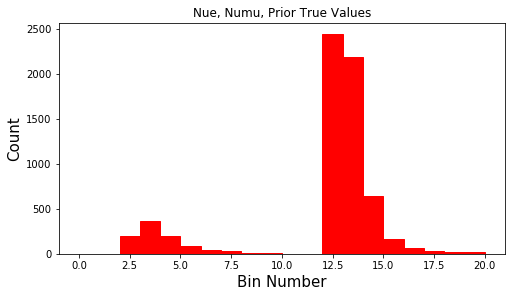

In [60]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Prior True Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("prior_true_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

Text(0.5, 1.0, 'Nue, Numu, Prior True Values Non Zero')

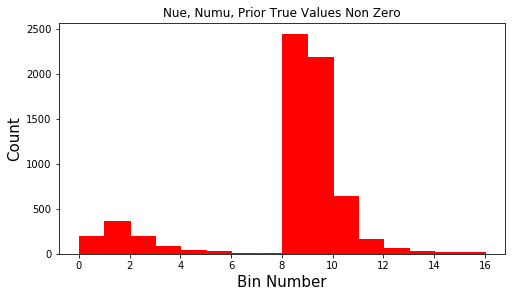

In [61]:
nue_numu_fig_nonzero = plt.figure(figsize=(8, 7))
nue_numu_gs_nonzero = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1_nonzero = plt.subplot(nue_numu_gs_nonzero[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)


sel_ratio = nue_numu_ax1_nonzero.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot_nonzero)
nue_numu_ax1_nonzero.set_ylabel('Count', fontsize=15)
nue_numu_ax1_nonzero.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1_nonzero.set_title("Nue, Numu, Prior True Values Non Zero")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

#nue_numu_fig_nonzero.savefig("prior_true_input_recoE_comb_nonzero_"+ending+".svg", bbox_inches='tight')

In [62]:
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_run3_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')    


In [63]:
if isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_comb_nonzero_"+ending+".csv", 
               nue_numu_tot_nonzero,
               delimiter =", ", 
               fmt ='% s')    
